In [1]:
# Necessary imports for the notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import librosa.display

In this notebook I will be checking doing some EDA, data cleaning, and checking and graphing all the data that I have processesed from my .wav files for my languages (english, spanish, chinese, arabic)

Before starting just wanted to give some insight on the data, there is 138 columns of encoded data + two more columns that are the language the encoded wav is associated with and the filename it came from

The encoded columns are made up of 5 parts (MFCC, Delta Derivative, Delta-squared Derivative, Chroma, and Spectral):

- MFCCs are a way to represent audio signals, particularly useful for understanding speech. Capturing important characteristics from the .wav file
- Delta MFCCs represent the rate of change of the MFCC coefficients over time. They help capture the velocity or the speed of changes in the spectral characteristics of the audio signal.
- Delta-Delta MFCCs represent the acceleration of the MFCC coefficients over time. They help capture the acceleration or the rate of change of the Delta MFCCs.
- Chroma is used for capturing harmonic and melodic characteristics
- Measure the difference in amplitude between peaks and valleys in a sound spectrum, are good for distinguishing between different sound types

1. Columns 0 to 39: MFCCs (Mel-Frequency Cepstral Coefficients)
2. Columns 40 to 79: Delta MFCCs (First-order difference of MFCCs)
3. Columns 80 to 119: Delta-Delta MFCCs (Second-order difference of MFCCs)
4. Columns 120 to 131: Chroma Features
5. Columns 132 to 138: Spectral Contrast
6. Column 139: Language
7. Column 140: Filename

Loading the csv file of the processed audio files

In [2]:
# Load the CSV file
csv_file = 'enhanced_audio_features.csv'
df = pd.read_csv(csv_file)

# Display the first few rows of the DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,language,filename
0,-591.799683,24.581469,-37.277557,38.943386,-23.944462,-14.795512,-28.425602,-16.783497,-7.817345,-8.559767,...,0.217268,26.129570,15.803774,20.529623,22.289690,25.511068,45.993349,44.811292,english,common_voice_en_39594868.wav
1,-576.281189,-26.610813,8.964808,18.043631,-2.475729,-13.256416,-6.601939,-3.505954,-14.481567,-0.506294,...,0.267795,22.236687,18.493144,22.960656,24.481830,28.726171,39.517955,40.607008,english,common_voice_en_39747444.wav
2,-577.874146,-10.416693,-0.817318,-2.560522,-10.961534,-4.025896,-17.892662,-7.834712,-16.051731,6.130054,...,0.330701,25.609026,18.291873,22.265934,28.645373,41.249017,39.341559,49.413993,english,common_voice_en_39605105.wav
3,-589.720764,-3.787693,-14.774078,-1.057446,-18.847878,-2.314374,-12.599625,-9.973179,-0.056920,-2.424583,...,0.295177,21.928503,22.384709,25.004169,25.883186,33.685769,41.335489,42.876258,english,common_voice_en_39746982.wav
4,-604.072510,20.000540,3.298214,15.598356,-1.135669,-0.940487,2.788907,-7.077954,-9.338453,-4.513753,...,0.262895,18.780236,13.624770,17.060084,23.583686,22.932342,25.704437,25.155519,english,common_voice_en_39806983.wav


In [3]:
# Show the index and columns of the DataFrame
print("\nIndex of the DataFrame:")
print(df.index)

print("\nColumns of the DataFrame:")
print(df.columns)


Index of the DataFrame:
RangeIndex(start=0, stop=193052, step=1)

Columns of the DataFrame:
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '131', '132', '133', '134', '135', '136', '137', '138', 'language',
       'filename'],
      dtype='object', length=141)


Here I am checking for the indexes and the columns of the dataframe

In [4]:
# Basic Information about the DataFrame
display("Basic Information about the DataFrame:")
df.info()

# Check for missing values
display("\nMissing Values:")
display(df.isnull().sum())

# Summary Statistics
print("\nSummary Statistics:")
display(df.describe())

'Basic Information about the DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193052 entries, 0 to 193051
Columns: 141 entries, 0 to filename
dtypes: float64(139), object(2)
memory usage: 207.7+ MB


'\nMissing Values:'

0           0
1           0
2           0
3           0
4           0
           ..
136         0
137         0
138         0
language    0
filename    0
Length: 141, dtype: int64


Summary Statistics:


,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
count,193052.000000,193052.000000,193052.000000,193052.000000,193052.000000,193052.000000,193052.000000,193052.000000,193052.000000,193052.000000,...,193052.000000,193052.000000,193052.000000,193052.000000,193052.000000,193052.000000,193052.000000,193052.000000,193052.000000,193052.000000
mean,-615.072954,22.790785,-9.629620,10.871642,-10.665501,-9.320954,-12.310162,-11.378491,-10.512437,-6.466257,...,0.338714,0.358970,0.314720,23.496191,18.599552,23.053337,25.885234,31.598767,38.766519,42.441961
std,79.267893,27.886832,16.875534,13.160446,12.331827,8.456274,9.330548,8.415562,6.904705,6.229118,...,0.094919,0.099197,0.102459,2.866679,2.500441,3.093283,4.234900,6.121637,7.442507,7.017443
min,-1126.647339,-183.271225,-121.017166,-57.285019,-75.633553,-54.372780,-59.161175,-48.243149,-47.946945,-35.677906,...,0.024207,0.018141,0.017308,1.252383,0.657754,0.640868,0.670546,0.822135,0.953924,3.252490
25%,-654.935913,3.741865,-20.800828,1.877887,-19.054262,-14.462351,-18.276193,-16.928698,-14.806231,-10.597416,...,0.273266,0.291711,0.244169,21.606972,16.979423,21.061355,22.942723,27.290984,33.766801,38.128407
50%,-606.337036,18.450121,-9.519049,10.900336,-10.258504,-8.999262,-11.768638,-11.196272,-10.316124,-6.420720,...,0.333699,0.350377,0.303992,23.764849,18.475752,23.183043,25.768552,31.446297,38.973042,42.166882
75%,-564.360931,36.800700,1.517978,19.994709,-1.725390,-3.840588,-5.761698,-5.706004,-5.921567,-2.315963,...,0.398536,0.416058,0.371658,25.506487,20.037686,25.140745,28.750336,35.715228,44.003584,46.913552
max,-248.000809,139.352173,73.485497,70.925560,34.341602,42.862251,28.423950,31.360483,25.486904,24.905651,...,1.000000,0.924535,0.941492,36.043126,35.433641,42.127482,52.581245,58.161978,68.603904,65.693432


Here I am checking the summary of my data and checking if there are any missing values (which seems like there are none)

In [5]:
# Check for duplicated rows
print("Checking for Duplicates:")
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop duplicate rows if any
df_cleaned = df.drop_duplicates()
print(f"Number of rows after dropping duplicates: {len(df_cleaned)}")

# Transpose the DataFrame and check for null values in columns
df_transposed = df_cleaned.T
print("\nTransposed DataFrame:")
print(df_transposed.head())

# Check for null values in the transposed DataFrame
print("\nNull values in transposed DataFrame columns:")
print(df_transposed.isnull())



Checking for Duplicates:
Number of duplicate rows: 0
Number of rows after dropping duplicates: 193052

Transposed DataFrame:
       0           1           2           3          4           5       \
0 -591.799683 -576.281189 -577.874146 -589.720764 -604.07251 -625.271423   
1   24.581469  -26.610813  -10.416693   -3.787693   20.00054    31.14069   
2  -37.277557    8.964808   -0.817318  -14.774078   3.298214   -5.491926   
3   38.943386   18.043631   -2.560522   -1.057446  15.598356   13.577068   
4  -23.944462   -2.475729  -10.961534  -18.847878  -1.135669    1.747078   

       6          7           8           9       ...      193042      193043  \
0 -598.480042 -583.31665 -551.039429 -627.185059  ... -605.280334 -569.224243   
1   24.997629  23.429068   10.737478   26.768173  ...   18.572886   26.268583   
2   -7.273332  -4.903889   -4.451171   -5.000535  ...   -1.307997   19.929382   
3    7.624482   -5.94301    4.322025   29.368441  ...   13.500235    7.218111   
4    1.955663

Here I am checking for duplicates between my rows and columns which seems like there are non

Counting samples in each label group:
language
arabic     67908
chinese    45397
english    43093
spanish    36654
Name: count, dtype: int64


/var/folders/hs/ktg0hj7j1ln5ccy20gzfxnv40000gn/T/ipykernel_28084/3290005335.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_group_counts.index, y=label_group_counts.values, palette="viridis")


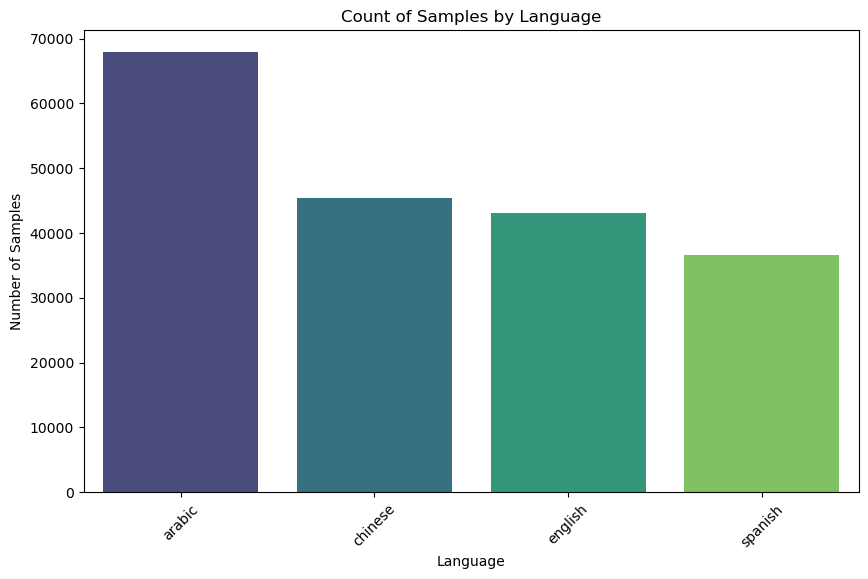

In [6]:
# Count the number of samples in each label group
print("Counting samples in each label group:")
label_group_counts = df_cleaned['language'].value_counts()
print(label_group_counts)

# Plot the count of samples in each label group
plt.figure(figsize=(10, 6))
sns.barplot(x=label_group_counts.index, y=label_group_counts.values, palette="viridis")
plt.xlabel('Language')
plt.ylabel('Number of Samples')
plt.title('Count of Samples by Language')
plt.xticks(rotation=45)
plt.show()

Here I am graphing all the .wav file count samples associated with their respective language

As we can see we have by far more arabic samples, followed by chinesem english and then spanish

Let's split the dataframe to 4 seperate ones associated with each language.

In [7]:
# Split data by labels into different DataFrames
language_dfs = {language: df_cleaned[df_cleaned['language'] == language].reset_index(drop=True) for language in df_cleaned['language'].unique()}
display(language_dfs)

# Save each label-specific DataFrame to a CSV file
for language, df_language in language_dfs.items():
    filename = f"{language}_data.csv"
    df_language.to_csv(filename, index=False)
    print(f"Saved DataFrame for language '{language}' to '{filename}'")

# Print out the number of samples in each language-specific DataFrame and display the first few rows
for language, df_language in language_dfs.items():
    print(f"\nDataFrame for language: {language}")
    print(f"Number of samples: {len(df_language)}")
    display(df_language.head())  # Using display for better formatting in Jupyter Notebook


{'english':                 0          1          2          3          4          5  \
 0     -591.799683  24.581469 -37.277557  38.943386 -23.944462 -14.795512   
 1     -576.281189 -26.610813   8.964808  18.043631  -2.475729 -13.256416   
 2     -577.874146 -10.416693  -0.817318  -2.560522 -10.961534  -4.025896   
 3     -589.720764  -3.787693 -14.774078  -1.057446 -18.847878  -2.314374   
 4     -604.072510  20.000540   3.298214  15.598356  -1.135669  -0.940487   
 ...           ...        ...        ...        ...        ...        ...   
 43088 -603.614319  47.851318 -26.905622  -6.791193 -16.324183   1.361501   
 43089 -645.244080  18.409344   9.991188  -3.029284 -14.274493 -19.143988   
 43090 -601.758850   5.162331 -11.784419   7.744843 -13.631920  -6.810972   
 43091 -659.444336  21.643837   8.345937  16.040804 -12.055821 -11.230274   
 43092 -641.375000  45.895313 -19.439846 -12.889212 -14.000484 -13.152296   
 
                6          7          8          9  ...       1

Saved DataFrame for language 'english' to 'english_data.csv'
Saved DataFrame for language 'spanish' to 'spanish_data.csv'
Saved DataFrame for language 'chinese' to 'chinese_data.csv'
Saved DataFrame for language 'arabic' to 'arabic_data.csv'

DataFrame for language: english
Number of samples: 43093


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,language,filename
0,-591.799683,24.581469,-37.277557,38.943386,-23.944462,-14.795512,-28.425602,-16.783497,-7.817345,-8.559767,...,0.217268,26.129570,15.803774,20.529623,22.289690,25.511068,45.993349,44.811292,english,common_voice_en_39594868.wav
1,-576.281189,-26.610813,8.964808,18.043631,-2.475729,-13.256416,-6.601939,-3.505954,-14.481567,-0.506294,...,0.267795,22.236687,18.493144,22.960656,24.481830,28.726171,39.517955,40.607008,english,common_voice_en_39747444.wav
2,-577.874146,-10.416693,-0.817318,-2.560522,-10.961534,-4.025896,-17.892662,-7.834712,-16.051731,6.130054,...,0.330701,25.609026,18.291873,22.265934,28.645373,41.249017,39.341559,49.413993,english,common_voice_en_39605105.wav
3,-589.720764,-3.787693,-14.774078,-1.057446,-18.847878,-2.314374,-12.599625,-9.973179,-0.056920,-2.424583,...,0.295177,21.928503,22.384709,25.004169,25.883186,33.685769,41.335489,42.876258,english,common_voice_en_39746982.wav
4,-604.072510,20.000540,3.298214,15.598356,-1.135669,-0.940487,2.788907,-7.077954,-9.338453,-4.513753,...,0.262895,18.780236,13.624770,17.060084,23.583686,22.932342,25.704437,25.155519,english,common_voice_en_39806983.wav



DataFrame for language: spanish
Number of samples: 36654


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,language,filename
0,-512.982178,38.367104,13.124542,-10.257490,-19.270151,-25.080746,-30.612322,-11.829333,-29.016188,-2.028050,...,0.204388,29.304623,19.595989,23.369723,26.831276,32.465711,41.346520,51.762982,spanish,common_voice_es_36523718.wav
1,-708.905823,99.742165,-33.178295,16.036505,9.639668,-10.047954,-5.737752,-20.245043,-11.564074,-8.650028,...,0.214355,26.070034,19.083392,22.532116,29.189228,42.300777,36.802694,39.980409,spanish,common_voice_es_35460417.wav
2,-710.928772,113.953255,-41.132660,31.375614,9.355724,-7.880741,-3.190809,-20.415470,-8.146853,-21.865160,...,0.223537,25.542089,17.539260,24.899047,26.133803,34.778757,39.965625,41.380517,spanish,common_voice_es_35274639.wav
3,-622.129578,36.396297,-14.439729,1.877097,8.639684,-8.090000,-30.918470,-13.125736,-9.243441,-5.699640,...,0.223023,23.909064,17.061456,25.074239,25.783864,38.830039,49.610628,55.883457,spanish,common_voice_es_36436301.wav
4,-645.060913,91.900192,-23.339172,-10.274010,6.514772,-14.451011,-10.897584,-12.905445,-21.707405,2.682846,...,0.354891,23.807214,18.276251,20.753057,27.316017,38.469032,44.717945,36.579377,spanish,common_voice_es_36291483.wav



DataFrame for language: chinese
Number of samples: 45397


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,language,filename
0,-1017.544006,-49.522202,-4.988313,-0.874908,-8.332916,0.014618,-2.886441,1.977308,-5.837831,3.959225,...,0.319579,13.156895,12.103097,15.184089,17.251139,18.799163,19.400662,56.565880,chinese,common_voice_zh-CN_18988285.wav
1,-564.310669,-0.120638,27.372967,5.761349,-12.831495,-2.620959,-19.371706,-6.092554,-15.603052,-2.891018,...,0.351178,21.473803,19.659853,24.378324,23.485432,40.755665,44.115839,44.736656,chinese,common_voice_zh-CN_18688878.wav
2,-593.878845,-9.956870,-0.424080,5.526564,2.045060,-9.124775,-14.842713,-7.094889,-4.879580,-5.207002,...,0.243473,25.792118,20.768195,24.194698,23.272147,25.927162,30.125628,41.759236,chinese,common_voice_zh-CN_22236139.wav
3,-531.706299,3.859460,-34.869663,4.752248,-25.348515,-4.721200,-5.684832,-4.140628,-6.373218,2.612388,...,0.313023,19.161030,15.249219,18.083398,21.690942,19.856457,27.013973,32.362162,chinese,common_voice_zh-CN_18665516.wav
4,-589.541016,24.604164,-15.799856,-0.824239,-4.240726,5.005403,-5.752282,-12.876758,-2.878704,-1.415065,...,0.150865,23.735555,20.231878,23.103989,25.833621,26.278062,51.788079,46.171866,chinese,common_voice_zh-CN_22211586.wav



DataFrame for language: arabic
Number of samples: 67908


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,language,filename
0,-529.468872,15.113606,-17.341951,1.379100,-38.588184,-10.963103,-27.401443,-0.460398,-8.584572,-10.155556,...,0.345326,22.157061,19.854407,24.254721,24.288065,34.329740,46.219121,47.665326,arabic,common_voice_ar_21834542.wav
1,-656.688171,35.908199,2.595228,25.952332,-3.788893,-27.018414,-14.962904,1.271116,-16.047482,-2.257768,...,0.332558,25.836680,17.063645,21.919567,27.706112,28.988248,42.496491,49.539016,arabic,common_voice_ar_24036487.wav
2,-549.746155,45.539886,-41.206146,50.725613,-13.221850,-10.237794,-10.869800,-27.623121,-4.656726,-14.404645,...,0.378642,26.268289,17.593635,22.256149,23.604414,24.394086,40.700893,43.292421,arabic,common_voice_ar_20492357.wav
3,-506.285553,11.189466,-35.283394,-0.029657,-32.962601,-17.805786,-17.376286,-20.234816,-7.975510,-9.574443,...,0.369828,17.810052,21.906785,24.142544,21.667910,27.005588,39.186750,52.241416,arabic,common_voice_ar_24050702.wav
4,-627.606750,12.197050,-0.824932,26.843092,-1.398712,5.848536,13.305772,2.360980,10.474019,6.014892,...,0.223598,19.497663,22.240686,25.539017,35.325019,44.916115,49.536574,48.384508,arabic,common_voice_ar_22447307.wav


Let's now plot out each column minus the `language` and `filename` columns

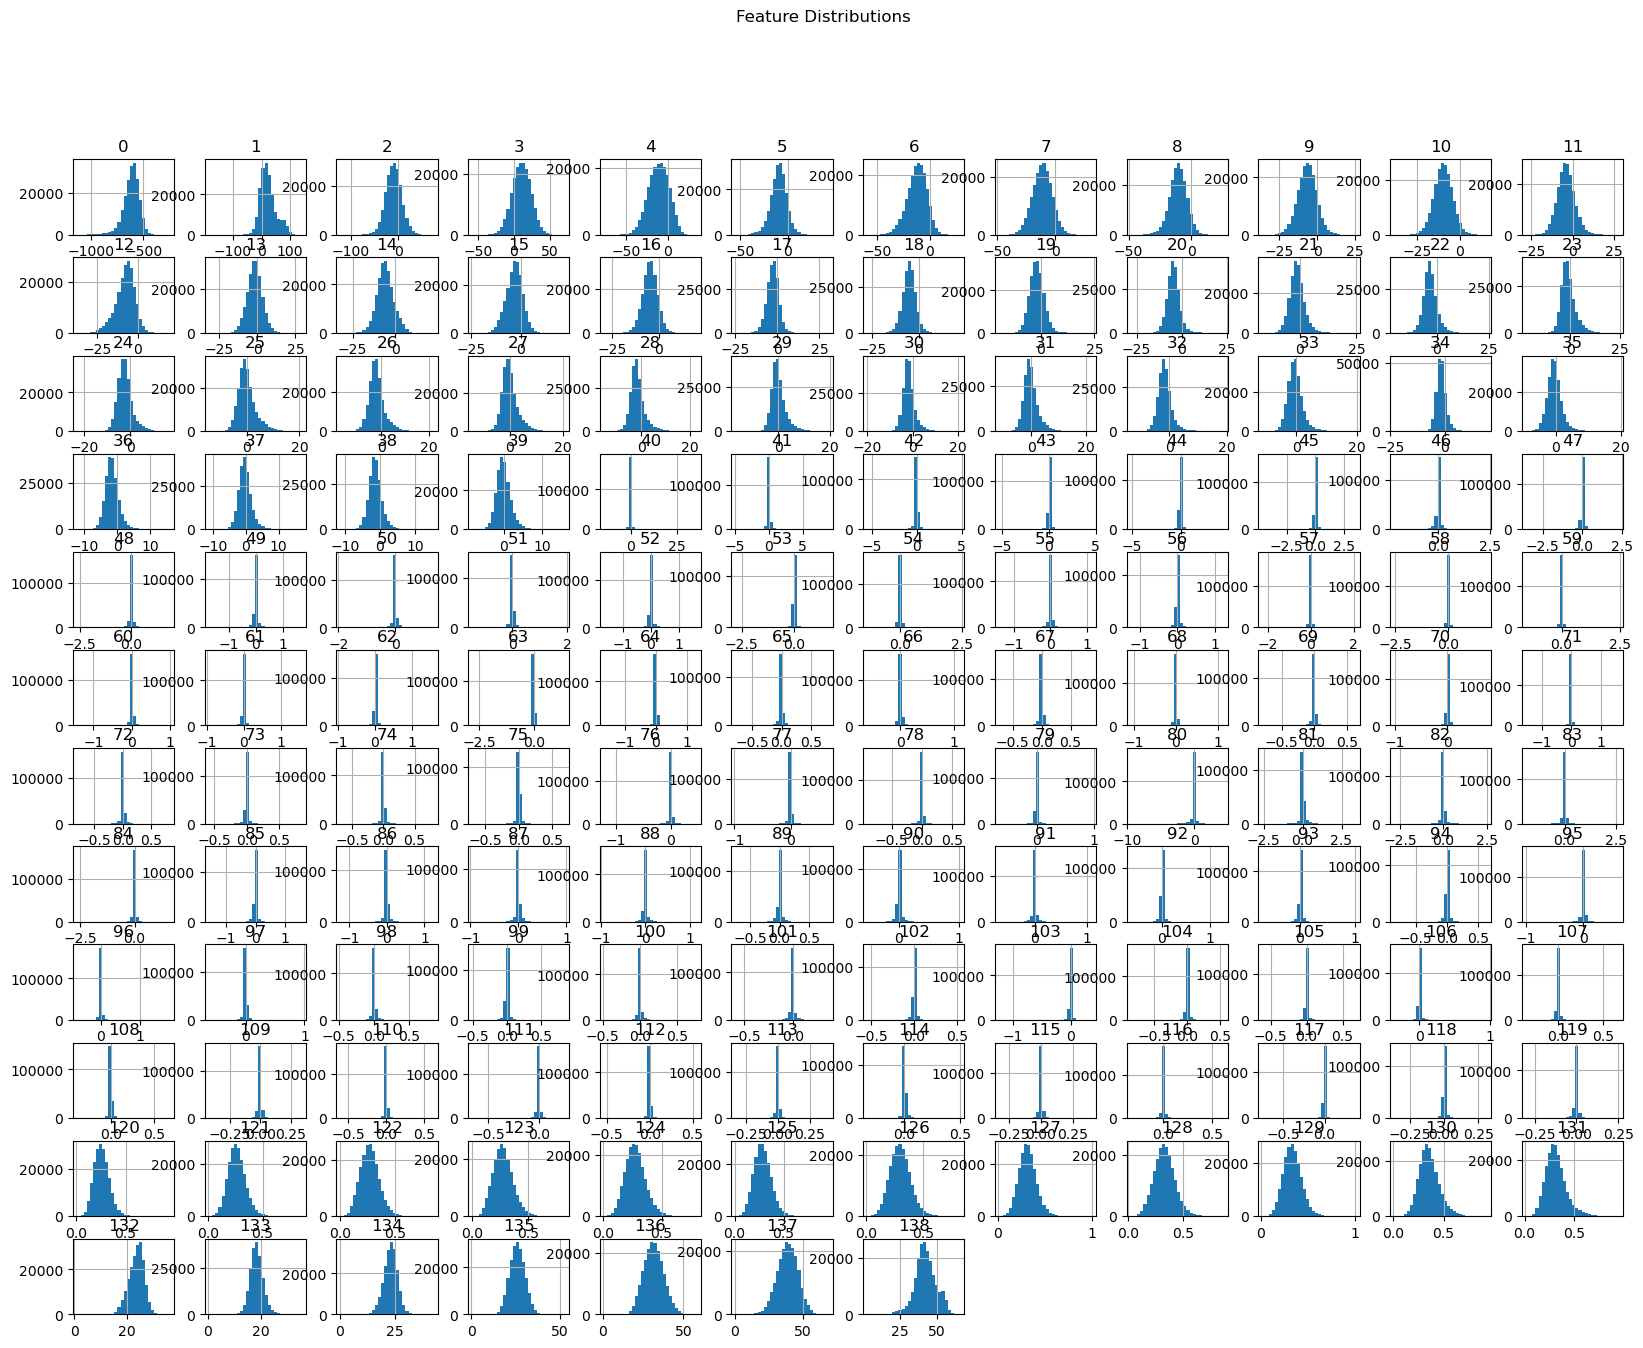

In [8]:
# Plot histograms for each feature
df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Feature Distributions")
plt.show()

It seems like for the most part all my columns follow a normal distribution pattern when plotting it out as a histogram

Let's inpsect the the shape of the feature vector that makes up our (MFCC, Delta, Delta-squared, Chroma, and Spectural Contrast)

In [9]:
# Inspect the shape of the first feature vector
print(df.iloc[0, :-2].values.shape)

(139,)


Now let's print the size of each section (MFCC, Delta, Delta-squared, Chroma, and Spectural Contrast)

In [10]:
import pandas as pd

# Load the CSV file
csv_file = 'enhanced_audio_features.csv'
df = pd.read_csv(csv_file)

# Separate features and labels
features = df.drop(['language', 'filename'], axis=1).values

# Extract the first feature vector
first_feature_vector = features[0]

# Define expected sizes based on your extraction function
n_mfcc = 40
n_delta_mfcc = 40
n_delta2_mfcc = 40
n_chroma = 12
n_spectral_contrast = 7

# Check the segments
mfcc_features = first_feature_vector[:n_mfcc]
delta_mfcc_features = first_feature_vector[n_mfcc:n_mfcc + n_delta_mfcc]
delta2_mfcc_features = first_feature_vector[n_mfcc + n_delta_mfcc:n_mfcc + n_delta_mfcc + n_delta2_mfcc]
chroma_features = first_feature_vector[n_mfcc + n_delta_mfcc + n_delta2_mfcc:n_mfcc + n_delta_mfcc + n_delta2_mfcc + n_chroma]
spectral_contrast_features = first_feature_vector[n_mfcc + n_delta_mfcc + n_delta2_mfcc + n_chroma:n_mfcc + n_delta_mfcc + n_delta2_mfcc + n_chroma + n_spectral_contrast]

print("MFCC size:", len(mfcc_features))
print("Delta MFCC size:", len(delta_mfcc_features))
print("Delta-Delta MFCC size:", len(delta2_mfcc_features))
print("Chroma size:", len(chroma_features))
print("Spectral Contrast size:", len(spectral_contrast_features))


MFCC size: 40
Delta MFCC size: 40
Delta-Delta MFCC size: 40
Chroma size: 12
Spectral Contrast size: 7


Le'ts plot spectrogram-like images to show the differentiation between each language and their respective column sections (MFCC, Delta, Delta-squared, Chroma, and Spectural Contrast)

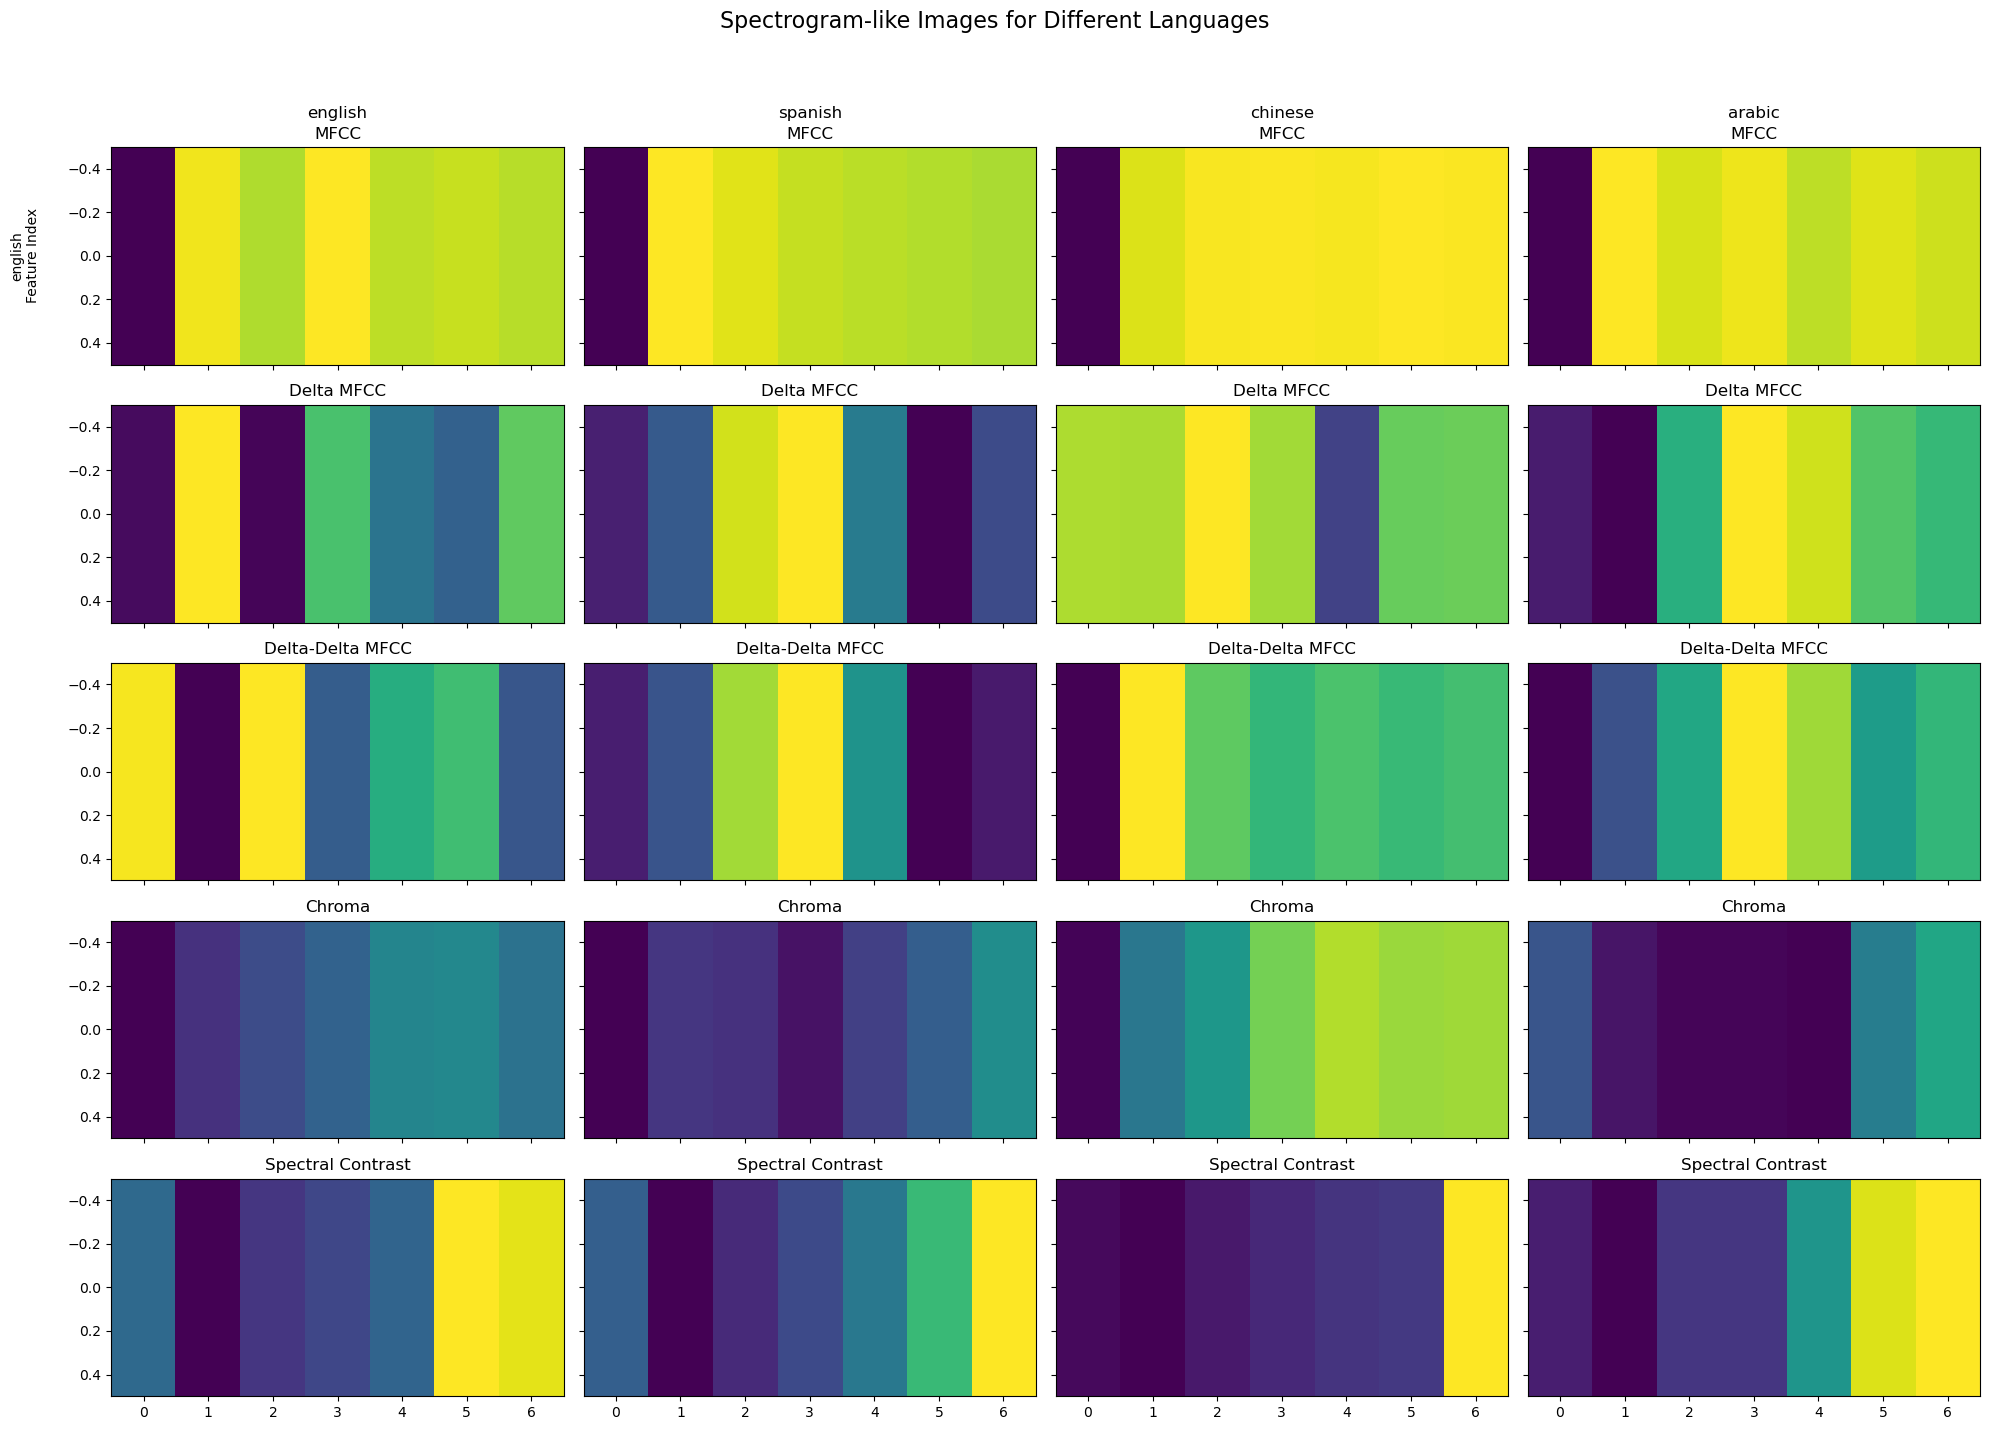

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
csv_file = 'enhanced_audio_features.csv'
df = pd.read_csv(csv_file)

def plot_spectrogram_like_image(axs, features, language, filename, n_mfcc=40, n_chroma=12, n_spectral_contrast=7):
    """Plot the features as a spectrogram-like image."""
    start = 0
    
    mfcc_features = features[start:start + n_mfcc]
    start += n_mfcc
    
    delta_mfcc_features = features[start:start + n_mfcc]
    start += n_mfcc
    
    delta2_mfcc_features = features[start:start + n_mfcc]
    start += n_mfcc
    
    chroma_features = features[start:start + n_chroma]
    start += n_chroma
    
    spectral_contrast_features = features[start:start + n_spectral_contrast]
    
    # Check sizes before plotting
    if (mfcc_features.shape[0] != n_mfcc or 
        delta_mfcc_features.shape[0] != n_mfcc or 
        delta2_mfcc_features.shape[0] != n_mfcc or 
        chroma_features.shape[0] != n_chroma or 
        spectral_contrast_features.shape[0] != n_spectral_contrast):
        print(f"Skipping sample due to size mismatch: {filename}")
        return
    
    axs[0].imshow(mfcc_features.reshape(1, -1), aspect='auto', cmap='viridis')
    axs[0].set_title('MFCC')
    
    axs[1].imshow(delta_mfcc_features.reshape(1, -1), aspect='auto', cmap='viridis')
    axs[1].set_title('Delta MFCC')
    
    axs[2].imshow(delta2_mfcc_features.reshape(1, -1), aspect='auto', cmap='viridis')
    axs[2].set_title('Delta-Delta MFCC')
    
    axs[3].imshow(chroma_features.reshape(1, -1), aspect='auto', cmap='viridis')
    axs[3].set_title('Chroma')
    
    axs[4].imshow(spectral_contrast_features.reshape(1, -1), aspect='auto', cmap='viridis')
    axs[4].set_title('Spectral Contrast')

    axs[0].set_ylabel(f'{language}\nFeature Index', labelpad=20)
    for ax in axs:
        ax.label_outer()

# Separate features and languages
features = df.drop(['language', 'filename'], axis=1).values
languages = df['language'].values
filenames = df['filename'].values

# Plot the first sample for each language in a 2x2 subplot grid
fig, axs = plt.subplots(5, 4, figsize=(20, 15), sharex=True)

unique_languages = df['language'].unique()
for idx, language in enumerate(unique_languages):
    sample_idx = df[df['language'] == language].index[0]
    plot_spectrogram_like_image(axs[:, idx], features[sample_idx], languages[sample_idx], filenames[sample_idx])

fig.suptitle('Spectrogram-like Images for Different Languages', fontsize=16)

# Add language labels to the top of each column
for idx, language in enumerate(unique_languages):
    axs[0, idx].annotate(language, xy=(0.5, 1.1), xytext=(0, 5),
                         xycoords='axes fraction', textcoords='offset points',
                         size='large', ha='center', va='baseline')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Between all the MFCC, Delta, Delta-squared, Chroma, and Spectural Contrast there seems to be a major difference between each language captured.

Now let's plot the .wav files of each language showing the actual audio wave and then afterwards we will plot the mel spectogram of each example

Le'ts start with the audio wave graph

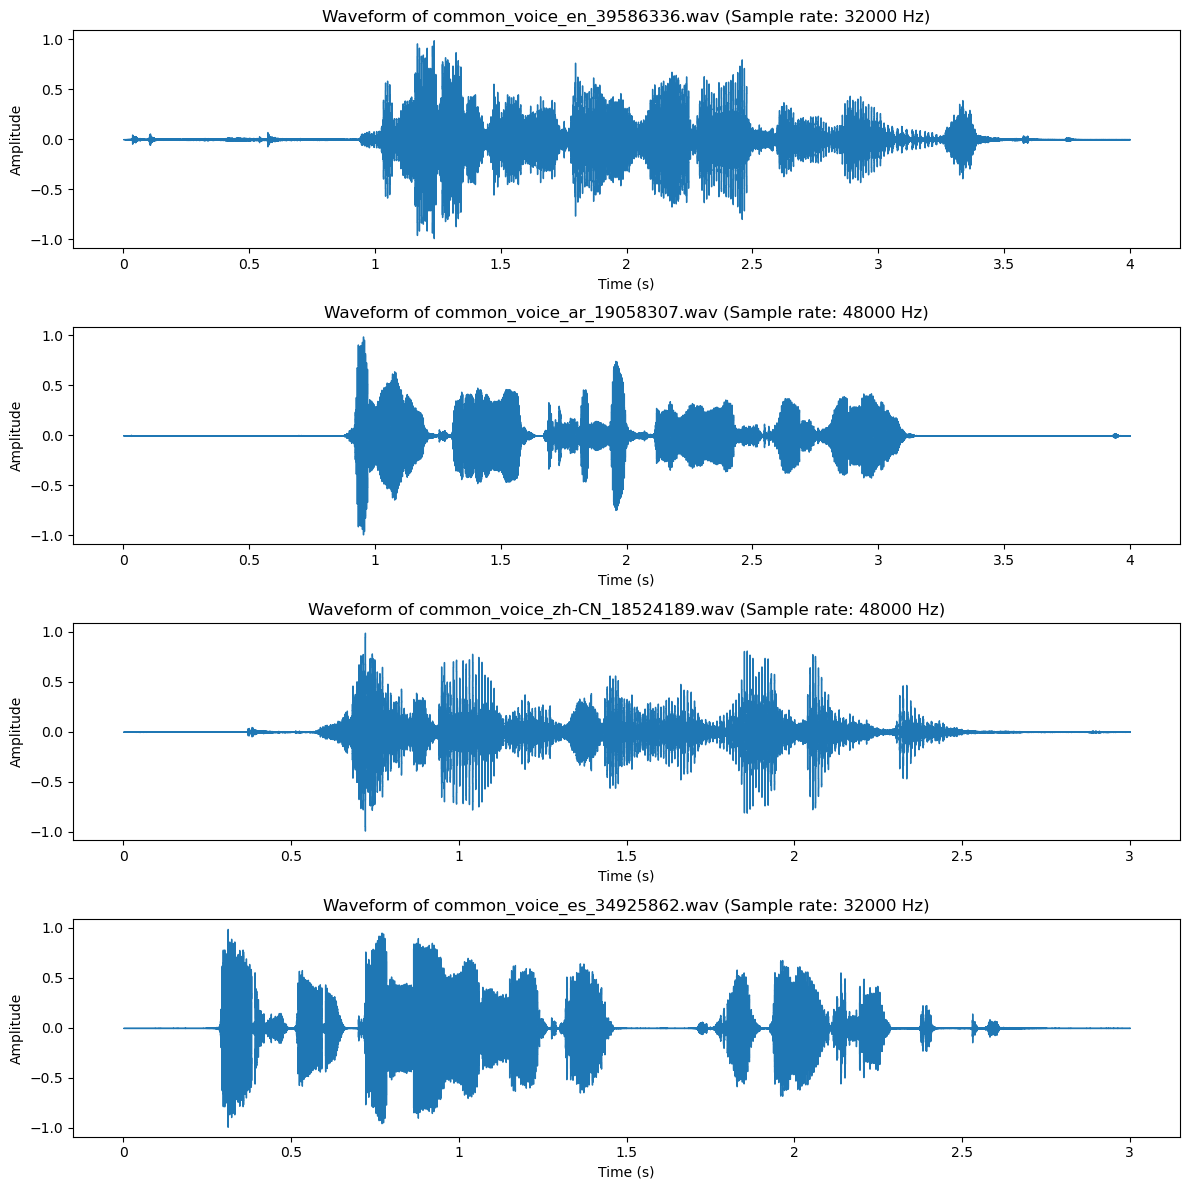

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_waveforms(audio_files):
    """Plot waveforms of the audio files."""
    fig, axes = plt.subplots(len(audio_files), 1, figsize=(12, 3 * len(audio_files)))
    for i, file_path in enumerate(audio_files):
        y, sr = librosa.load(file_path, sr=None)
        librosa.display.waveshow(y, sr=sr, ax=axes[i])
        axes[i].set_title(f'Waveform of {os.path.basename(file_path)} (Sample rate: {sr} Hz)')
        axes[i].set_xlabel('Time (s)')
        axes[i].set_ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

def plot_mel_spectrograms(audio_files):
    """Plot mel-spectrograms of the audio files."""
    fig, axes = plt.subplots(len(audio_files), 1, figsize=(12, 3 * len(audio_files)))
    for i, file_path in enumerate(audio_files):
        y, sr = librosa.load(file_path, sr=None)
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
        S_dB = librosa.power_to_db(S, ref=np.max)
        img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000, ax=axes[i], cmap='viridis')
        fig.colorbar(img, ax=axes[i], format='%+2.0f dB')
        axes[i].set_title(f'Mel-Spectrogram of {os.path.basename(file_path)} (Sample rate: {sr} Hz)')
        axes[i].set_xlabel('Time (s)')
        axes[i].set_ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

# List of audio files to visualize
audio_files = [
    '/Users/rodeshel/Documents/Brainstation/capstone-project/cleaned_data/english/common_voice_en_39586336.wav',
    '/Users/rodeshel/Documents/Brainstation/capstone-project/cleaned_data/arabic/common_voice_ar_19058307.wav',
    '/Users/rodeshel/Documents/Brainstation/capstone-project/cleaned_data/chinese/common_voice_zh-CN_18524189.wav',
    '/Users/rodeshel/Documents/Brainstation/capstone-project/cleaned_data/spanish/common_voice_es_34925862.wav',
]

# Plot each type of visualization in separate sets of subplots
plot_waveforms(audio_files)


As we can further see there seems to be a major significant difference between the shapes of each language that can be captured.

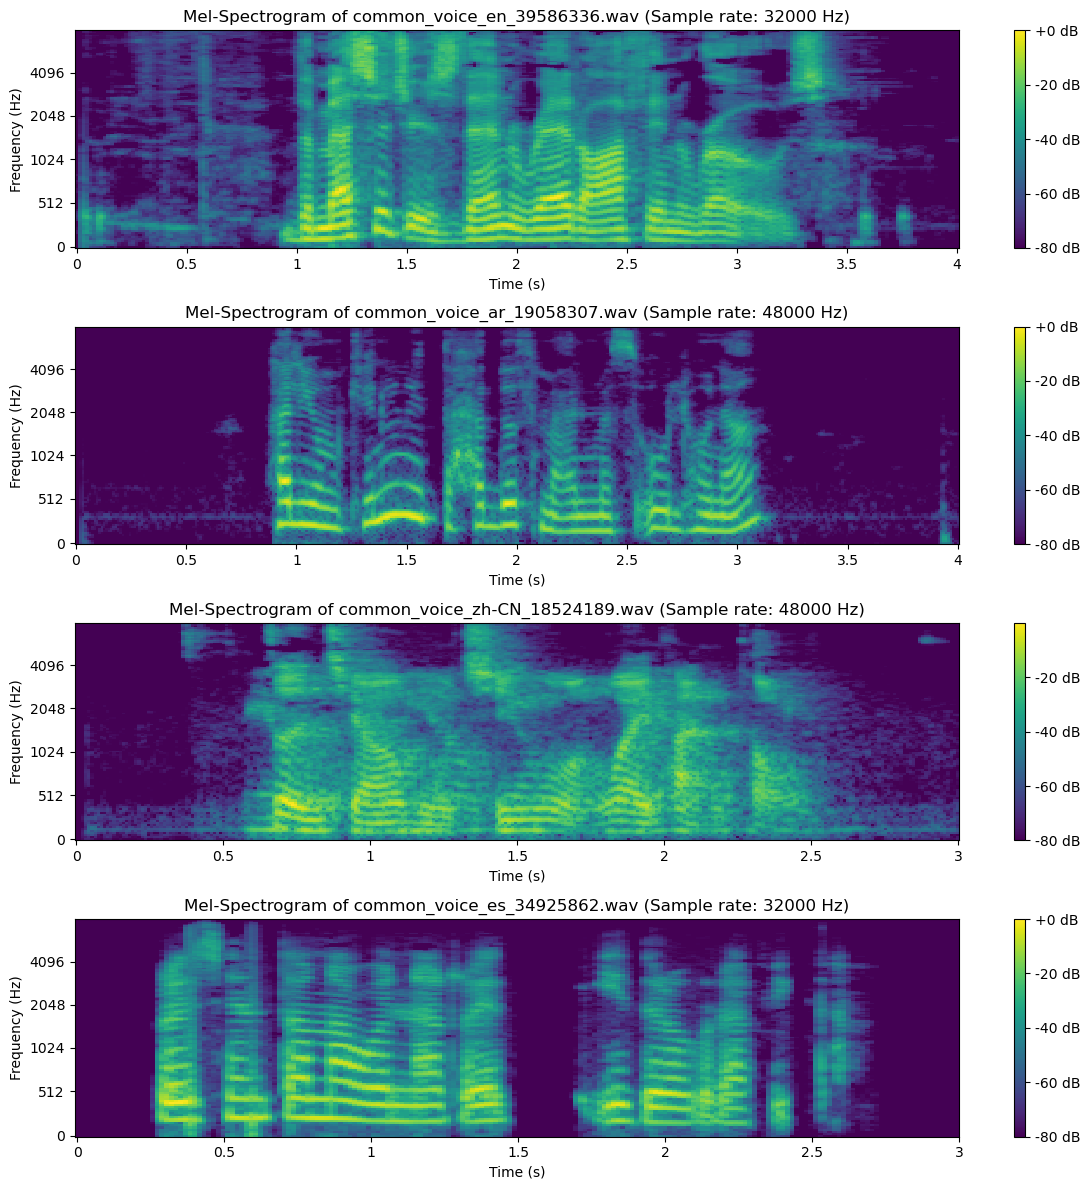

In [13]:
def plot_mel_spectrograms(audio_files):
    """Plot mel-spectrograms of the audio files."""
    fig, axes = plt.subplots(len(audio_files), 1, figsize=(12, 3 * len(audio_files)))
    for i, file_path in enumerate(audio_files):
        y, sr = librosa.load(file_path, sr=None)
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
        S_dB = librosa.power_to_db(S, ref=np.max)
        img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000, ax=axes[i], cmap='viridis')
        fig.colorbar(img, ax=axes[i], format='%+2.0f dB')
        axes[i].set_title(f'Mel-Spectrogram of {os.path.basename(file_path)} (Sample rate: {sr} Hz)')
        axes[i].set_xlabel('Time (s)')
        axes[i].set_ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

# List of audio files to visualize
audio_files = [
    '/Users/rodeshel/Documents/Brainstation/capstone-project/cleaned_data/english/common_voice_en_39586336.wav',
    '/Users/rodeshel/Documents/Brainstation/capstone-project/cleaned_data/arabic/common_voice_ar_19058307.wav',
    '/Users/rodeshel/Documents/Brainstation/capstone-project/cleaned_data/chinese/common_voice_zh-CN_18524189.wav',
    '/Users/rodeshel/Documents/Brainstation/capstone-project/cleaned_data/spanish/common_voice_es_34925862.wav',
]

plot_mel_spectrograms(audio_files)

As we see the mel-spectrum (just like the wave audio graph) captures different shapes per language.

Now let's plot all the features (columns 0 to 138) from our dataframe for each language (grabbing one row from each language)

Plotting features for spanish language:


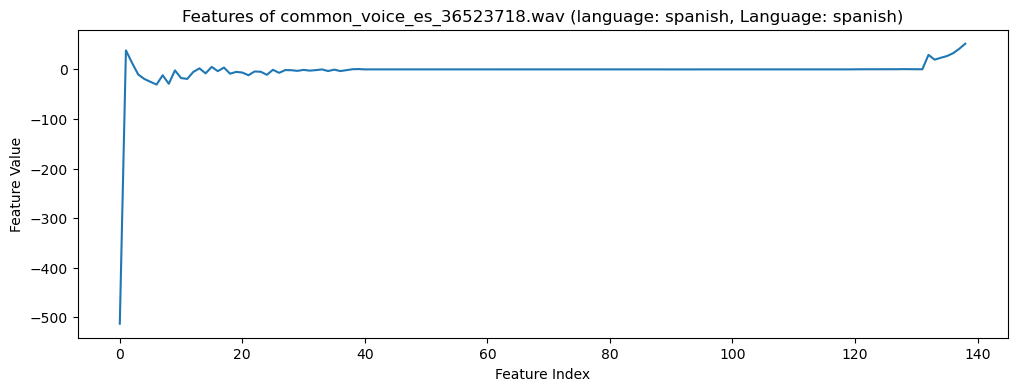

Plotting features for english language:


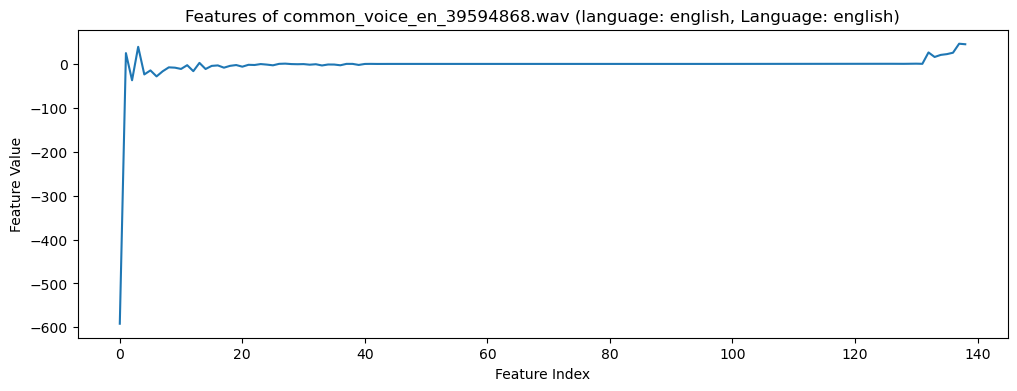

Plotting features for arabic language:


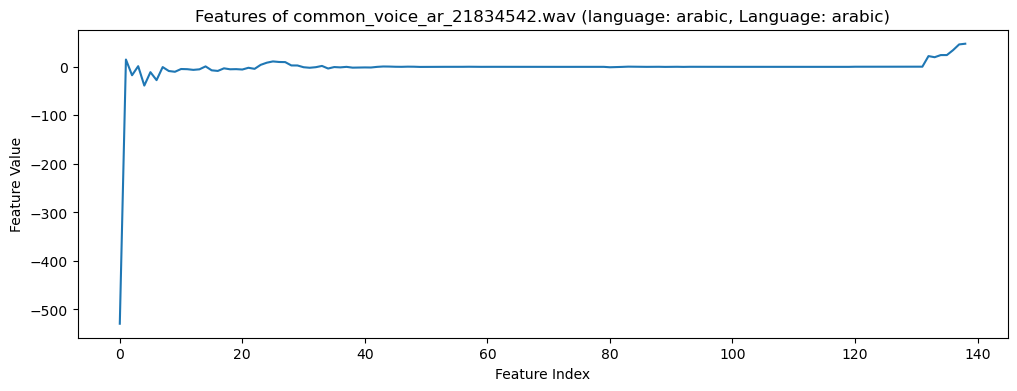

Plotting features for chinese language:


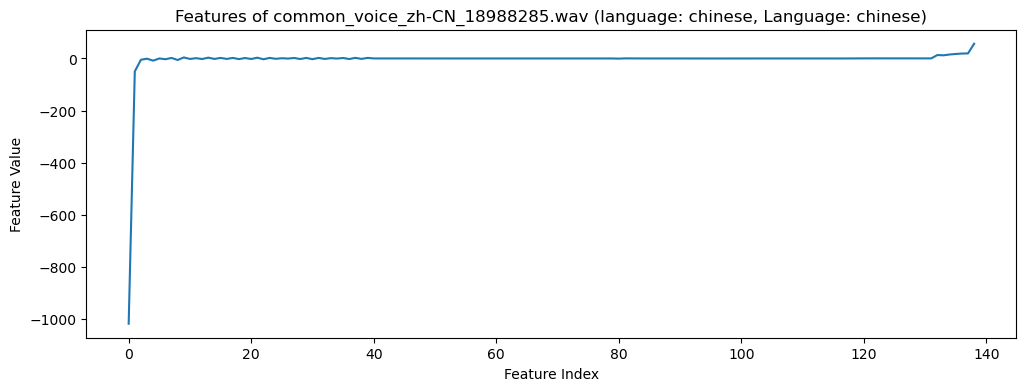

In [14]:
# Define the CSV file paths
file_paths = {
    'spanish': 'spanish_data.csv',
    'english': 'english_data.csv',
    'arabic': 'arabic_data.csv',
    'chinese': 'chinese_data.csv'
}

# Function to plot the features of a row
def plot_features(row, index, language):
    features = row[:-2].values.astype(float)  # Exclude the label and filename columns
    language = row['language']
    filename = row['filename']
    
    plt.figure(figsize=(12, 4))
    plt.plot(features)
    plt.title(f'Features of {filename} (language: {language}, Language: {language})')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')
    plt.show()

# Load each CSV file and plot the first 5 rows
for language, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    print(f"Plotting features for {language} language:")
    for index, row in df.head(1).iterrows():
        plot_features(row, index, language)

There still seems to be a discrepancy between all of the languages in terms of shape. Most of these major changes are in the start of each plot.

Now let's capture the mean features of each language in a graph.

Plotting mean features for spanish language:


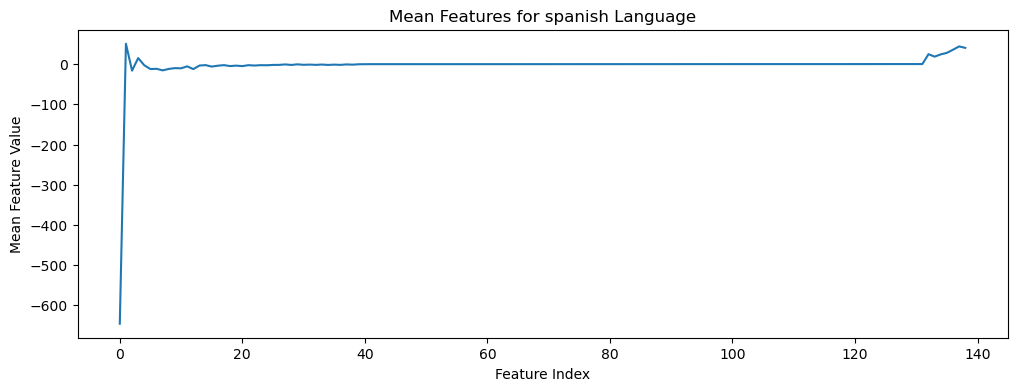

Plotting mean features for english language:


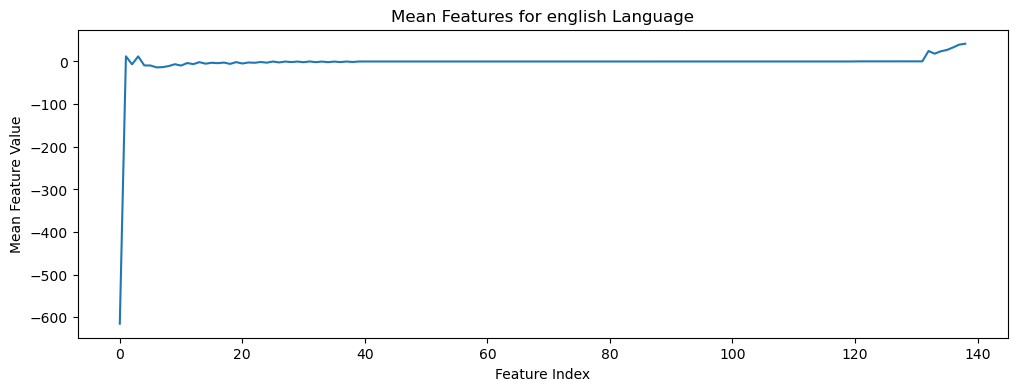

Plotting mean features for arabic language:


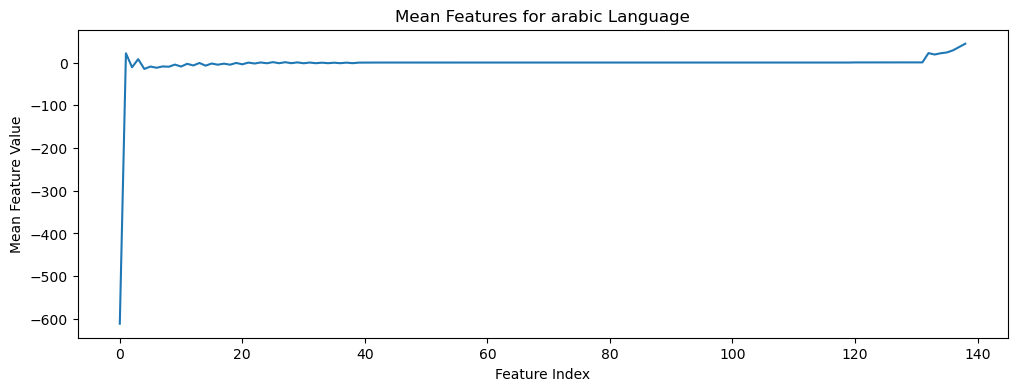

Plotting mean features for chinese language:


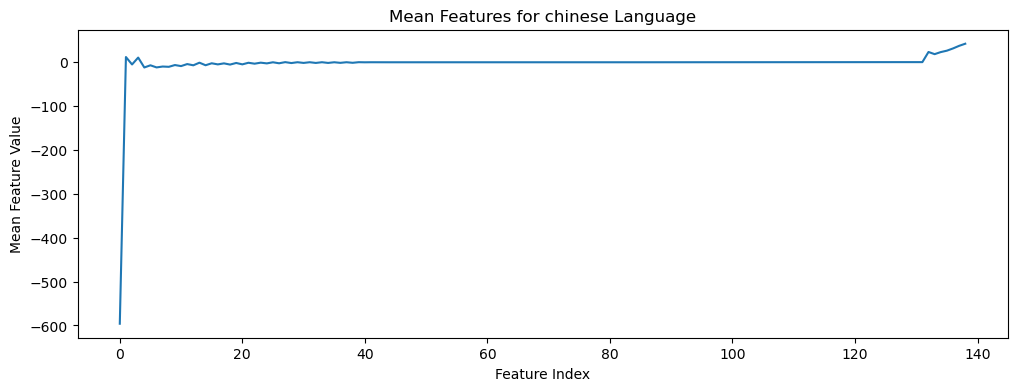

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the CSV file paths
file_paths = {
    'spanish': 'spanish_data.csv',
    'english': 'english_data.csv',
    'arabic': 'arabic_data.csv',
    'chinese': 'chinese_data.csv'
}

# Function to plot the mean features of a language dataset
def plot_mean_features(df, language):
    features = df.iloc[:, :-2].values.astype(float)  # Exclude the label and filename columns
    mean_features = features.mean(axis=0)
    
    plt.figure(figsize=(12, 4))
    plt.plot(mean_features)
    plt.title(f'Mean Features for {language} Language')
    plt.xlabel('Feature Index')
    plt.ylabel('Mean Feature Value')
    plt.show()

# Load each CSV file, compute the mean of the features, and plot the mean features
for language, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    print(f"Plotting mean features for {language} language:")
    plot_mean_features(df, language)

Though there are still changes our changes are differences between languages seem to be a lot more marginal, especially between chinese and english

Let's plot normalized mean values of the mfccs.

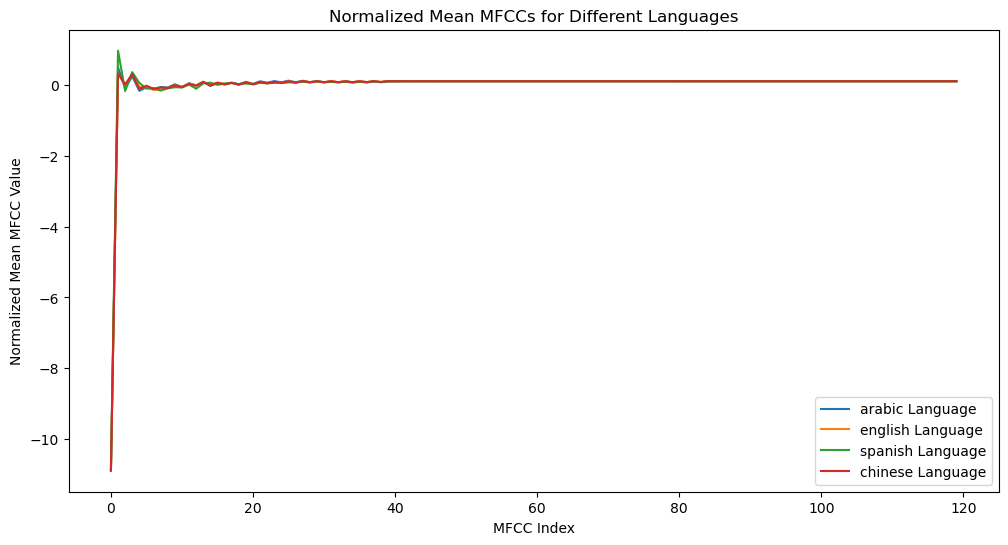

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the CSV file paths
file_paths = {
    'arabic': 'arabic_data.csv',
    'english': 'english_data.csv',
    'spanish': 'spanish_data.csv',
    'chinese': 'chinese_data.csv'
}

# Function to normalize the MFCC features
def normalize_mfcc(mfccs):
    return (mfccs - np.mean(mfccs)) / np.std(mfccs)

# Function to plot the mean MFCC features for a language
def plot_mean_mfcc(df, language, ax):
    # Indices for MFCCs, Delta MFCCs, and Delta-Delta MFCCs
    n_mfcc = 40
    n_delta_mfcc = 40
    n_delta2_mfcc = 40
    n_total_mfcc = n_mfcc + n_delta_mfcc + n_delta2_mfcc
    
    features = df.iloc[:, :n_total_mfcc].values.astype(float)  # Take only the MFCC features
    mean_features = features.mean(axis=0)
    normalized_mean_features = normalize_mfcc(mean_features)
    
    ax.plot(normalized_mean_features, label=f'{language} Language')

# Create a single figure and axis to overlay the plots
fig, ax = plt.subplots(figsize=(12, 6))

# Load each CSV file, compute the mean of the MFCC features, normalize, and plot the mean MFCCs
for language, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    plot_mean_mfcc(df, language, ax)

# Customize the plot
ax.set_title('Normalized Mean MFCCs for Different Languages')
ax.set_xlabel('MFCC Index')
ax.set_ylabel('Normalized Mean MFCC Value')
ax.legend()
plt.show()


The difference between each seem to be minimal between each MFCC of each language. Therefore let's plot the delta derivative and delta-squared MFCCs

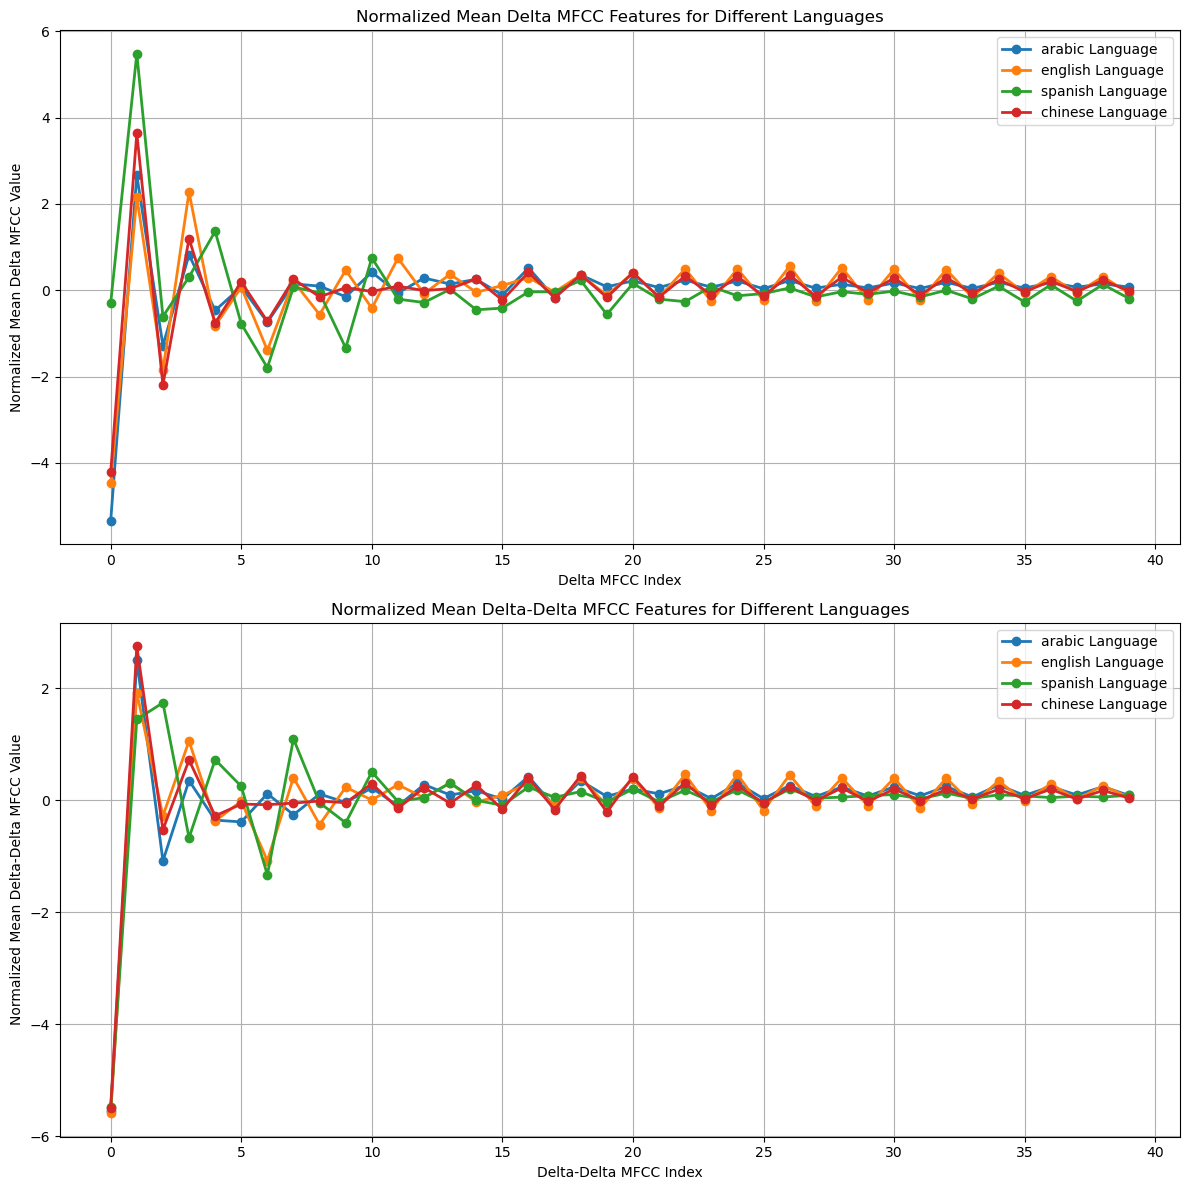

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the CSV file paths
file_paths = {
    'arabic': 'arabic_data.csv',
    'english': 'english_data.csv',
    'spanish': 'spanish_data.csv',
    'chinese': 'chinese_data.csv'
}

# Function to normalize the features
def normalize_features(features):
    return (features - np.mean(features)) / np.std(features)

# Function to plot the mean Delta MFCC and Delta-Delta MFCC features for a language
def plot_mean_delta_mfccs(df, language, axs):
    # Indices for Delta MFCCs and Delta-Delta MFCCs
    n_mfcc = 40
    n_delta_mfcc = 40
    n_delta2_mfcc = 40
    
    delta_mfccs = df.iloc[:, n_mfcc:n_mfcc + n_delta_mfcc].values.astype(float)
    delta2_mfccs = df.iloc[:, n_mfcc + n_delta_mfcc:n_mfcc + n_delta_mfcc + n_delta2_mfcc].values.astype(float)
    
    mean_delta_mfccs = delta_mfccs.mean(axis=0)
    mean_delta2_mfccs = delta2_mfccs.mean(axis=0)
    
    normalized_delta_mfccs = normalize_features(mean_delta_mfccs)
    normalized_delta2_mfccs = normalize_features(mean_delta2_mfccs)
    
    axs[0].plot(normalized_delta_mfccs, label=f'{language} Language', linewidth=2, marker='o')
    axs[1].plot(normalized_delta2_mfccs, label=f'{language} Language', linewidth=2, marker='o')

# Create a figure with subplots for Delta MFCCs and Delta-Delta MFCCs
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
axs[0].set_title('Normalized Mean Delta MFCC Features for Different Languages')
axs[0].set_xlabel('Delta MFCC Index')
axs[0].set_ylabel('Normalized Mean Delta MFCC Value')

axs[1].set_title('Normalized Mean Delta-Delta MFCC Features for Different Languages')
axs[1].set_xlabel('Delta-Delta MFCC Index')
axs[1].set_ylabel('Normalized Mean Delta-Delta MFCC Value')

# Load each CSV file, compute the mean of the Delta MFCC and Delta-Delta MFCC features, normalize, and plot them
for language, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    plot_mean_delta_mfccs(df, language, axs)

# Customize the layout
for ax in axs:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


As can be seen there is way more of a difference between each language when it comes to the delta derivative and delta-squared derivative of each language that we can use in our machine learning model for better accuracy.

Now let's plot the rest of the sections such as mean Chroma and and Spectral Contrast.

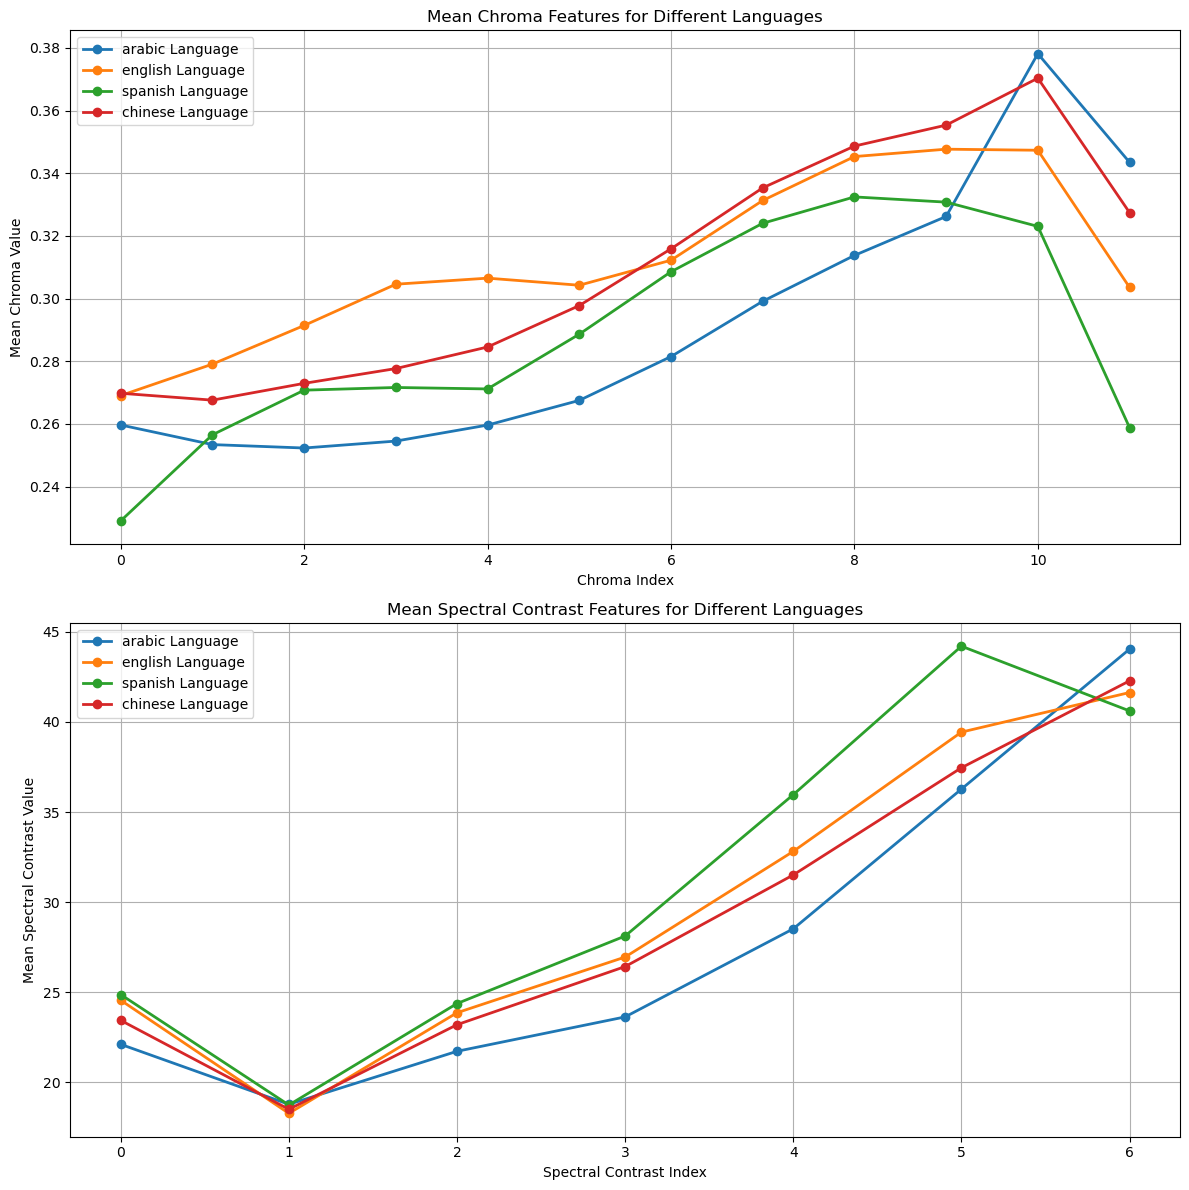

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the CSV file paths
file_paths = {
    'arabic': 'arabic_data.csv',
    'english': 'english_data.csv',
    'spanish': 'spanish_data.csv',
    'chinese': 'chinese_data.csv'
}

# Function to plot additional features for a language
def plot_additional_features(df, language, axs):
    # Columns after the first 120 are Chroma (12) and Spectral Contrast (7)
    n_mfcc = 40
    n_delta_mfcc = 40
    n_delta2_mfcc = 40
    n_chroma = 12
    n_spectral_contrast = 7
    
    # Indices for feature extraction
    chroma_start_idx = n_mfcc + n_delta_mfcc + n_delta2_mfcc
    chroma_end_idx = chroma_start_idx + n_chroma
    spectral_contrast_start_idx = chroma_end_idx
    spectral_contrast_end_idx = spectral_contrast_start_idx + n_spectral_contrast

    # Extract Chroma and Spectral Contrast features
    chroma = df.iloc[:, chroma_start_idx:chroma_end_idx].values.astype(float)
    spectral_contrast = df.iloc[:, spectral_contrast_start_idx:spectral_contrast_end_idx].values.astype(float)
    
    # Compute mean features
    mean_chroma = chroma.mean(axis=0)
    mean_spectral_contrast = spectral_contrast.mean(axis=0)
    
    # Plot features
    axs[0].plot(mean_chroma, label=f'{language} Language', linewidth=2, marker='o')
    axs[1].plot(mean_spectral_contrast, label=f'{language} Language', linewidth=2, marker='o')

# Create a figure with subplots for additional features
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
axs[0].set_title('Mean Chroma Features for Different Languages')
axs[0].set_xlabel('Chroma Index')
axs[0].set_ylabel('Mean Chroma Value')

axs[1].set_title('Mean Spectral Contrast Features for Different Languages')
axs[1].set_xlabel('Spectral Contrast Index')
axs[1].set_ylabel('Mean Spectral Contrast Value')

# Load each CSV file, compute the mean of the additional features, and plot them
for language, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    # Drop non-numerical columns if present
    numerical_df = df.select_dtypes(include=[np.number])
    plot_additional_features(numerical_df, language, axs)

# Customize the layout
for ax in axs:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


Though all the languages follow a similar pattern plotted shape there are still a gap between each of the languages which can be used to differentiate them from one another.